<h3>Exploratory analyses</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import jsonlines
from functools import reduce
import statistics
import scipy.stats
import seaborn as sns
import math
import os
import json
import ast
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.bayes_mixed_glm import PoissonBayesMixedGLM
from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM
import matplotlib.patches as mpatches

import pingouin as pg
import warnings
from scipy.stats import ttest_rel
#from statannotations.Annotator import Annotator
from scipy.stats import skew
from statsmodels.stats.diagnostic import het_white
from sklearn.preprocessing import PowerTransformer
import statannot
from scipy.stats import ttest_ind
import itertools
from dataclean_func import *
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.copy_on_write = True

In [2]:
task_summary=pd.read_csv('U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/dem_vids_task_excluded.csv')
chosen_stim_df=pd.read_csv('U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/chosen_stim_excluded.csv')
vid_ratings_df=pd.read_csv('U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/ratings_df.csv')

In [3]:
task_summary

,Unnamed: 0,percentage_correct,mean_perseverative_er,mean_regressive_er,median_till_correct,mean_till_correct,win_stay,lose_shift,timed_out,block_no,...,unspecified,digit_span,prolific_age,prolific_sex,prolific_MH,time taken,self_report_gender,self_report_assigned-at-birth,self_report_age,aligns
0,0,0.716418,1.142857,0.428571,8.0,8.428571,0.951220,0.520000,0,1.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
1,1,0.875000,0.000000,0.285714,6.0,6.142857,1.000000,0.733333,0,2.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
2,2,0.757143,0.714286,0.857143,10.0,9.285714,1.000000,0.739130,0,3.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
3,3,0.753086,0.285714,1.714286,12.0,10.857143,0.947368,0.782609,0,2.0,...,0,6.0,52,Male,No,40.283333,Male,Yes,52,True
4,4,0.634615,1.000000,3.142857,13.0,13.428571,0.937500,0.641026,0,1.0,...,0,6.0,52,Male,No,40.283333,Male,Yes,52,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1207,0.758065,0.428571,0.857143,6.0,8.142857,0.954545,0.529412,0,1.0,...,0,7.0,47,Female,Yes,95.150000,Female,Yes,47,True
1016,1208,0.535000,1.571429,9.857143,17.0,25.000000,0.669811,0.483871,1,3.0,...,0,7.0,47,Female,Yes,95.150000,Female,Yes,47,True
1017,1212,0.723577,0.000000,4.000000,12.0,16.714286,0.862500,0.738095,0,3.0,...,0,9.0,64,Male,No,50.083333,Male,Yes,64,True
1018,1213,0.683333,0.714286,3.571429,13.0,15.285714,0.942029,0.780000,0,1.0,...,0,9.0,64,Male,No,50.083333,Male,Yes,64,True


<h3>Looking at overall task performance across blocks (i.e., percentage correct)</h3>

Percentage correct: -0.49987154559115393


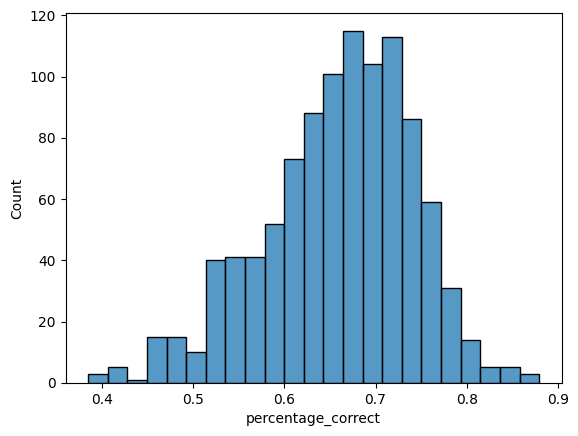

In [4]:
sns.histplot(data=task_summary, x="percentage_correct") 
print('Percentage correct: '+str(skew(task_summary.percentage_correct)))
##no skew (but almost - cut-off was -0.5)

<b>For completion will do model selection as done for planned analyses</b>

In [5]:
data=task_summary.reset_index()

formula = 'percentage_correct ~ block_type'

basic_model=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)

u:\Documents\envs\disgust_reversal_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<Axes: xlabel='percentage_correct_transformed', ylabel='Count'>

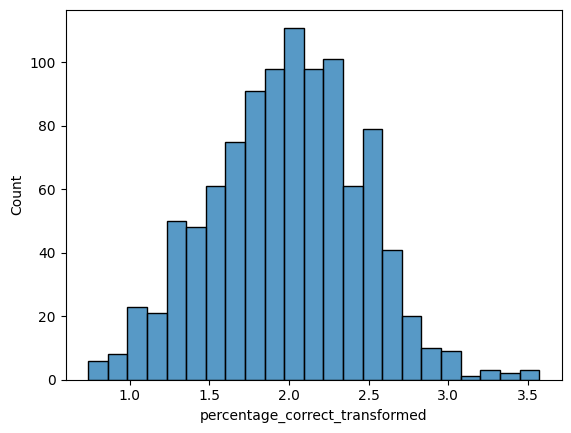

In [6]:
##because it doesn't converge will see if fixing the skew helps
pt=PowerTransformer(method='yeo-johnson', standardize=False)
skl_yeojohnson=pt.fit(pd.DataFrame(task_summary.percentage_correct))
skl_yeojohnson=pt.transform(pd.DataFrame(task_summary.percentage_correct))
task_summary['percentage_correct_transformed'] = pt.transform(pd.DataFrame(task_summary.percentage_correct))
sns.histplot(data=task_summary['percentage_correct_transformed'])

In [7]:
data=task_summary.reset_index()

formula = 'percentage_correct_transformed ~ block_type'

basic_model=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)

Test which random effects to include (commenting out models which didn't converge)

   basic_model feedback_randint fractals_randint  feedback_fractals_randint  \
0  1224.203612                                                  1393.567909   

     randslope  feedback_randint_randslope  \
0  1256.302925                  1263.23048   

   feedback_fractals_randint_randslope  
0                          1270.158038  


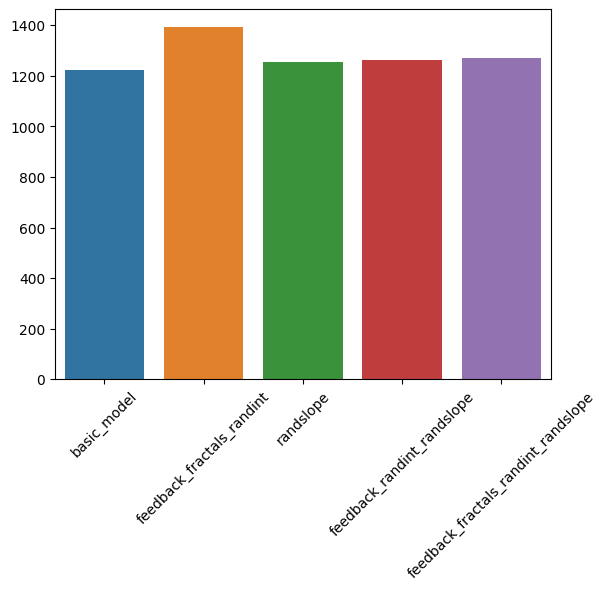

In [8]:
#test which random effects to include
#feedback_randint=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'feedback_details': '0+feedback_details'}).fit(reml=False) 
#fractals_randint=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'fractals': '0+fractals'}).fit(reml=False) 
feedback_fractals_randint=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={"feedback_details": "0 + feedback_details", "fractals": "0 + fractals"}).fit(reml=False)

randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', re_formula='~block_type').fit(reml=False)
feedback_randint_randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'feedback_details': '0+feedback_details'}, re_formula='~block_type').fit(reml=False) 
feedback_fractals_randint_randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'feedback_details': '0+feedback_details', "fractals": "0 + fractals"}, re_formula='~block_type').fit(reml=False) 


bic=pd.DataFrame({'basic_model': [basic_model.bic], 
                    'feedback_randint': [''], 
                    'fractals_randint': [''],
                    'feedback_fractals_randint': [feedback_fractals_randint.bic], ##added manually
                    'randslope': [randslope.bic],
                    'feedback_randint_randslope':[feedback_randint_randslope.bic],
                    'feedback_fractals_randint_randslope': [feedback_fractals_randint_randslope.bic]})
sns.barplot(bic)
plt.xticks(rotation=45) 
print(bic) ##in this case, basic model is the best

Test which covariates to add

   no_covariate  age_covariate  digit_span_covariate  sex_covariate  \
0   1224.203612    1226.819157           1230.500113    1231.128145   

   digit_span_age_covariate  sex_age_covariate  sex_digit_span_covariate  \
0                1233.50694        1233.746584               1237.425969   

   sex_age_digit_span_covariate  
0                    1240.43227  


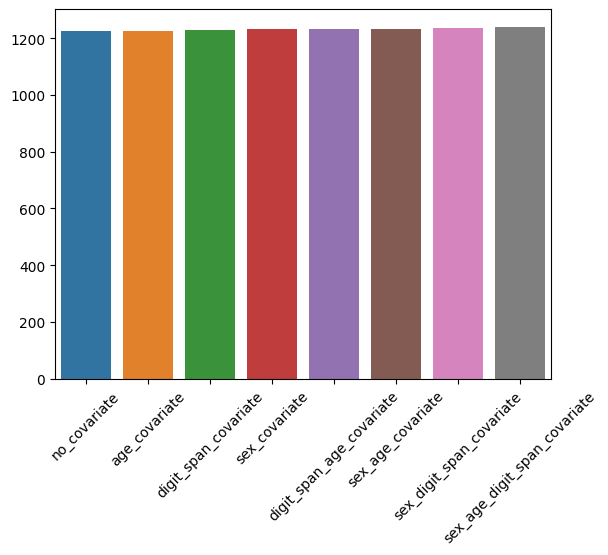

In [9]:
##test which covariates to add -- Using the random effects which were best above (basic model in this case)
no_covariate=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)
sex_covariate=smf.mixedlm(formula+str('+prolific_sex'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
age_covariate=smf.mixedlm(formula+str('+prolific_age'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
digit_span_covariate=smf.mixedlm(formula+str('+digit_span'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
sex_age_covariate=smf.mixedlm(formula+str('+prolific_sex+prolific_age'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
sex_digit_span_covariate=smf.mixedlm(formula+str('+prolific_sex+digit_span'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
digit_span_age_covariate=smf.mixedlm(formula+str('+digit_span+prolific_age'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
sex_age_digit_span_covariate=smf.mixedlm(formula+str('+prolific_sex+prolific_age+digit_span'), data, groups=data['participant_no'], missing='drop').fit(reml=False)

bic=pd.DataFrame({'no_covariate': [no_covariate.bic], 
                    'sex_covariate': [sex_covariate.bic], 
                    'age_covariate': [age_covariate.bic],
                    'digit_span_covariate': [digit_span_covariate.bic],
                    'sex_age_covariate': [sex_age_covariate.bic],
                    'sex_digit_span_covariate': [sex_digit_span_covariate.bic],
                    'digit_span_age_covariate': [digit_span_age_covariate.bic],
                    'sex_age_digit_span_covariate': [sex_age_digit_span_covariate.bic]})
plt.xticks(rotation=45)
sns.barplot(bic.sort_values(by=0, axis=1))
print(bic.sort_values(by=0, axis=1))  ##in this case, nocovariate is the best

<b>Now use that best fitting model for hypothesis testing </b>

In [10]:
#Hypothesis test using this model (and if no covariate model hadn't won - would run this too)
no_covariate.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
============================================================================
Model:            MixedLM Dependent Variable: percentage_correct_transformed
No. Observations: 1020    Method:             ML                            
No. Groups:       340     Scale:              0.1280                        
Min. group size:  3       Log-Likelihood:     -594.7829                     
Max. group size:  3       Converged:          Yes                           
Mean group size:  3.0                                                       
------------------------------------------------------------------------------
                           Coef.   Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------------------
Intercept                  1.963      0.025   77.110   0.000    1.913    2.013
block_type[T.Fear]         0.025      0.027    0.924   0.355   -0.028    0.079
block_type[T.Points]       0.047      0.027    1.713   0.087   -0.007    0.101
Group Var                  0.092      0.035                                   
============================================================================

"""

Test the assumptions of this model

In [11]:
#chosen model
results=no_covariate

#shapiro-Wilk test of normality of residuals
labels = ["Statistic", "p-value"]
norm_res = stats.shapiro(results.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)
    ##if test is significant then the assumption is violated
        #is significant here

##homoskedasticity of variance 
#White Lagrange Multiplier Test for Heteroscedasticity
het_white_res = het_white(results.resid, results.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)
    ##again, only violated if you get a significant p value

Statistic 0.9939829017305208
p-value 0.0004039411738375382
LM Statistic 0.8449396257443453
LM-Test p-value 0.6554260394578453
F-Statistic 0.42157647682504173
F-Test p-value 0.6561264053767323


Normality of residuals is violated - so need a generalized mixed effects model
<p>see percentage_correct.ipynb in the exploratory_generalized_mixed effects_model folder
<p>this model finds <b>no effect of block-type</b>. So we can be confident that the decrease in lose-shift is not due to an overall change in task performance on the disgust-block (e.g., due to inattention or increased distraction)

<p>We can test our certainty of this using a Bayes factor</p>

In [12]:
##Bayes factor analysis
def bayes_factor(df, dependent_var, condition_1_name, condition_2_name):
    df=df[(df.block_type==condition_1_name)| (df.block_type==condition_2_name)][[dependent_var, 'block_type', 'participant_no']]
    df.dropna(inplace=True)
    df=df.pivot(index='participant_no', columns='block_type', values=dependent_var).reset_index()
    ttest=pg.ttest(df[condition_1_name], df[condition_2_name], paired=True)
    bf_null=1/float(ttest.BF10)
    return bf_null

In [13]:
bayes_factor(task_summary, 'percentage_correct', 'Disgust', 'Points')
#effect size of 3 suggests moderate support for the null

3.546099290780142

<h3>Assessing the effect of video ratings on lose-shift result</h3>
<p>In the planned analysis, we assessed whether all hypothesis testing models were affected by differences between <b>fear and disgust</b> detected in the video rating analyses</p>
<p>These analyses were planned in order to assess whether any differences between fear and disgust were driven by any differences in valence and arousal</p>
<br>
<p>However, since no hypothesis testing model found a difference between fear and disgust, instead finding a difference bewteen <b>points and disgust</b> - arguably these video ratings were not the most relevant ones to include.</p>
<p>Instead, it makes more sense to test whether the difference between <b>points and disgust</b> is driven by the differences between <b>points and disgust</b> found in the video rating analyses.</p>
<p>Namely, whether the difference between disgust and points learning (indexed by lose-shift probability) is driven by:
<li>the difference in valence found between points and disgust feedback
<li>the difference in fear rating found between points and disgust
<li>the difference in disgust rating found between points and disgust

In [14]:
chosen_stim_df

,Unnamed: 0,Vid,trial_type,unpleasant_1,unpleasant_2,arousing_1,arousing_2,disgusting_1,disgusting_2,frightening_1,...,unspecified,digit_span,prolific_age,prolific_sex,prolific_MH,time taken,self_report_gender,self_report_assigned-at-birth,self_report_age,aligns
0,0,1414,disgust,6.0,5.0,7.0,7.0,7.0,5.0,1.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
1,1,1202,fear,6.0,6.0,7.0,7.0,1.0,1.0,8.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
2,2,points,points,5.0,NaN,7.0,NaN,0.0,NaN,0.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
3,3,0046,fear,4.0,3.0,4.0,5.0,1.0,1.0,5.0,...,0,6.0,52,Male,No,40.283333,Male,Yes,52,True
4,4,points,points,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6.0,52,Male,No,40.283333,Male,Yes,52,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1207,1987,disgust,7.0,7.0,7.0,7.0,8.0,8.0,6.0,...,0,7.0,47,Female,Yes,95.150000,Female,Yes,47,True
1016,1208,0374,fear,7.0,8.0,8.0,7.0,3.0,6.0,8.0,...,0,7.0,47,Female,Yes,95.150000,Female,Yes,47,True
1017,1212,1202,fear,3.0,1.0,7.0,6.0,0.0,0.0,8.0,...,0,9.0,64,Male,No,50.083333,Male,Yes,64,True
1018,1213,1414,disgust,6.0,7.0,6.0,6.0,6.0,8.0,1.0,...,0,9.0,64,Male,No,50.083333,Male,Yes,64,True


In [15]:
##due to error some don't have points values - so will have to exclude them
participants_to_remove=list(set(chosen_stim_df[chosen_stim_df.unpleasant_1.isna()].participant_no))
chosen_stim_df_short=chosen_stim_df[~chosen_stim_df['participant_no'].isin(participants_to_remove)]
task_summary_short=task_summary[~task_summary['participant_no'].isin(participants_to_remove)]

In [16]:
stim_ratings_covariates=pd.DataFrame()
block_feedback=pd.DataFrame()
for participant_no in set(chosen_stim_df_short.participant_no):
    participant_df=chosen_stim_df_short[chosen_stim_df_short.participant_no==participant_no]
    disgust=participant_df[participant_df.trial_type=="disgust"]
    points=participant_df[participant_df.trial_type=="points"]
    valence_diff=int(points.unpleasant_1)-int(disgust.unpleasant_1)
    disgust_diff=int(points.disgusting_1)-int(disgust.disgusting_1)
    fear_diff=int(points.frightening_1)-int(disgust.frightening_1)

    
    row=pd.DataFrame({
        'participant_no': [participant_no],
        'points_valence_diff': [valence_diff],
        'points_disgust_diff': [disgust_diff],
        'points_fear_diff': [fear_diff]
    })
    stim_ratings_covariates=pd.concat([stim_ratings_covariates, row])

First step - show that the original effect remains in this slightly smaller sample
<p>As some individuals were not asked to rate the points feedback due to an error in the task code

In [17]:
data=pd.merge(task_summary_short, stim_ratings_covariates, on='participant_no', how='outer')
formula = 'lose_shift ~ block_type + prolific_age'
results=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)
print(results.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   lose_shift
No. Observations:   774       Method:               ML        
No. Groups:         258       Scale:                0.0086    
Min. group size:    3         Log-Likelihood:       506.1864  
Max. group size:    3         Converged:            Yes       
Mean group size:    3.0                                       
--------------------------------------------------------------
                     Coef. Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.584    0.027 21.616 0.000  0.531  0.637
block_type[T.Fear]   0.008    0.008  0.991 0.322 -0.008  0.024
block_type[T.Points] 0.024    0.008  2.935 0.003  0.008  0.040
prolific_age         0.001    0.001  2.273 0.023  0.000  0.002
Group Var            0.015    0.021                           



And assumptions are not violated

In [18]:
#shapiro-Wilk test of normality of residuals
labels = ["Statistic", "p-value"]
norm_res = stats.shapiro(results.resid)
for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)
##homoskedasticity of variance 
#White Lagrange Multiplier Test for Heteroscedasticity
het_white_res = het_white(results.resid, results.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

Statistic 0.9968560320035522
p-value 0.13431948228636714
LM Statistic 9.649873076065337
LM-Test p-value 0.14019220110754563
F-Statistic 1.6138879266252484
F-Test p-value 0.14029116748449807


Firstly, add difference in points valence to this model

In [19]:
formula = 'lose_shift ~ block_type + prolific_age + points_valence_diff'
results=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)
print(results.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   lose_shift
No. Observations:   774       Method:               ML        
No. Groups:         258       Scale:                0.0086    
Min. group size:    3         Log-Likelihood:       506.5363  
Max. group size:    3         Converged:            Yes       
Mean group size:    3.0                                       
--------------------------------------------------------------
                     Coef. Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.584    0.027 21.652 0.000  0.531  0.637
block_type[T.Fear]   0.008    0.008  0.991 0.322 -0.008  0.024
block_type[T.Points] 0.024    0.008  2.935 0.003  0.008  0.040
prolific_age         0.001    0.001  2.354 0.019  0.000  0.002
points_valence_diff  0.003    0.003  0.837 0.402 -0.004  0.009
Group Var            0.015    0.021                           



In [20]:
#shapiro-Wilk test of normality of residuals
labels = ["Statistic", "p-value"]
norm_res = stats.shapiro(results.resid)
for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)
##homoskedasticity of variance 
#White Lagrange Multiplier Test for Heteroscedasticity
het_white_res = het_white(results.resid, results.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

Statistic 0.996875766121291
p-value 0.13768605101460607
LM Statistic 15.003047295227848
LM-Test p-value 0.18235746548695933
F-Statistic 1.3693098501100363
F-Test p-value 0.1823464541373501


See if adding disgust difference has an effect

In [21]:
formula = 'lose_shift ~ block_type + prolific_age + points_disgust_diff'
results=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)
print(results.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   lose_shift
No. Observations:    774       Method:               ML        
No. Groups:          258       Scale:                0.0086    
Min. group size:     3         Log-Likelihood:       506.2876  
Max. group size:     3         Converged:            Yes       
Mean group size:     3.0                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.579    0.029 19.954 0.000  0.522  0.636
block_type[T.Fear]    0.008    0.008  0.991 0.322 -0.008  0.024
block_type[T.Points]  0.024    0.008  2.935 0.003  0.008  0.040
prolific_age          0.001    0.001  2.182 0.029  0.000  0.002
points_disgust_diff  -0.001    0.003 -0.450 0.653 -0.008  0.005
Group Var             0.015    0.021                 

In [22]:
#shapiro-Wilk test of normality of residuals
labels = ["Statistic", "p-value"]
norm_res = stats.shapiro(results.resid)
for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)
##homoskedasticity of variance 
#White Lagrange Multiplier Test for Heteroscedasticity
het_white_res = het_white(results.resid, results.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

Statistic 0.9968587635300259
p-value 0.13478081560871702
LM Statistic 13.99286803812323
LM-Test p-value 0.23338836965430107
F-Statistic 1.275414519947943
F-Test p-value 0.2338896211450073


And also fear ratings

In [23]:
formula = 'lose_shift ~ block_type + prolific_age + points_fear_diff'
results=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)
print(results.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   lose_shift
No. Observations:   774       Method:               ML        
No. Groups:         258       Scale:                0.0086    
Min. group size:    3         Log-Likelihood:       506.2015  
Max. group size:    3         Converged:            Yes       
Mean group size:    3.0                                       
--------------------------------------------------------------
                     Coef. Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.583    0.028 20.893 0.000  0.528  0.638
block_type[T.Fear]   0.008    0.008  0.991 0.322 -0.008  0.024
block_type[T.Points] 0.024    0.008  2.935 0.003  0.008  0.040
prolific_age         0.001    0.001  2.258 0.024  0.000  0.002
points_fear_diff     0.001    0.004  0.174 0.862 -0.007  0.008
Group Var            0.015    0.021                           



In [24]:
#shapiro-Wilk test of normality of residuals
labels = ["Statistic", "p-value"]
norm_res = stats.shapiro(results.resid)
for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)
##homoskedasticity of variance 
#White Lagrange Multiplier Test for Heteroscedasticity
het_white_res = het_white(results.resid, results.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

Statistic 0.9968608235660454
p-value 0.13512972404044749
LM Statistic 11.034426462481596
LM-Test p-value 0.44038365643170174
F-Statistic 1.0018601644139105
F-Test p-value 0.4427627079625978


<h3>Examining the nature of outliers in the perseverative error outcome</h3>
<p>The perseverative error outcome in the hypothesis testing model seemed to be quite dependent on outliers. Therefore, here we assess the nature of those outliers:
<p> a) to determine whether they are 'true' outliers (i.e., due to inattention etc.) resulting in alterations in task performance across all metrics</p>
<p>b) to determine whether these outliers performed differently on the video rating task (e.g., were they more disgusted, leading to their altered task performance?)
<p>c) to determine whether these outliers differed from the general sample in terms of psychiatric diagnosis

In [25]:
##add stimulus rating totals for each category to task summary dataframe
stim_ratings_totals=pd.DataFrame()
block_feedback=pd.DataFrame()
for participant_no in set(chosen_stim_df_short.participant_no):
    participant_df=chosen_stim_df_short[chosen_stim_df_short.participant_no==participant_no]
    disgust=participant_df[participant_df.trial_type=="disgust"]
    fear=participant_df[participant_df.trial_type=="fear"]
    points=participant_df[participant_df.trial_type=="points"]
    disgust_score=int(disgust.unpleasant_1)+int(disgust.unpleasant_2)+int(disgust.arousing_1)+int(disgust.arousing_2)
    fear_score=int(fear.unpleasant_1)+int(fear.unpleasant_2)+int(fear.arousing_1)+int(fear.arousing_2)
    points_score=int(points.unpleasant_1)+int(points.arousing_1)
    
    row=pd.DataFrame({
        'participant_no': [participant_no],
        'disgust_score': [disgust_score],
        'fear_score': [fear_score],
        'points_score': [points_score],
        'all_emotion_score': [disgust_score + fear_score + points_score]
    })
    stim_ratings_totals=pd.concat([stim_ratings_totals, row])
task_summary=pd.merge(task_summary, stim_ratings_totals, on='participant_no', how='outer')

Number of outliers =37


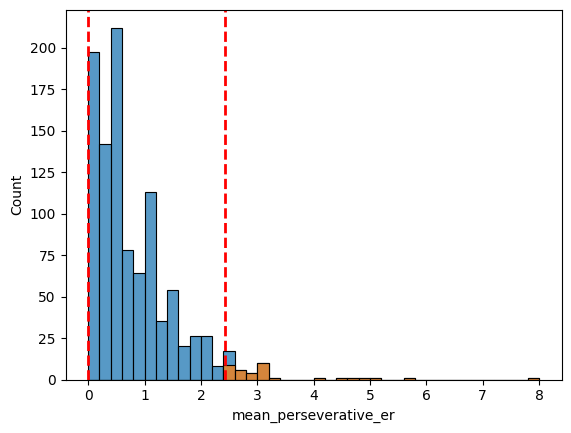

In [26]:
##identify the outliers in the perseverative error outcome
Q1 = task_summary['mean_perseverative_er'].quantile(0.25)
Q3 = task_summary['mean_perseverative_er'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1- 1.5 *  IQR
upper_bound = Q3 + 1.5 *  IQR
if lower_bound < min(task_summary.mean_perseverative_er):
    lower_bound = min(task_summary.mean_perseverative_er)
outliers=task_summary[(task_summary['mean_perseverative_er']<lower_bound) | (task_summary['mean_perseverative_er']>upper_bound )]

bin_width=0.2
bins=np.arange(min(task_summary.mean_perseverative_er), max(task_summary.mean_perseverative_er) + bin_width, bin_width)
sns.histplot(data=task_summary, bins=bins, x="mean_perseverative_er") 
sns.histplot(data=outliers, bins=bins,
x="mean_perseverative_er") 
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='Upper Bound')
print("Number of outliers ="+str(len(outliers)))

Text(0.5, 23.52222222222222, 'Lose-shift')

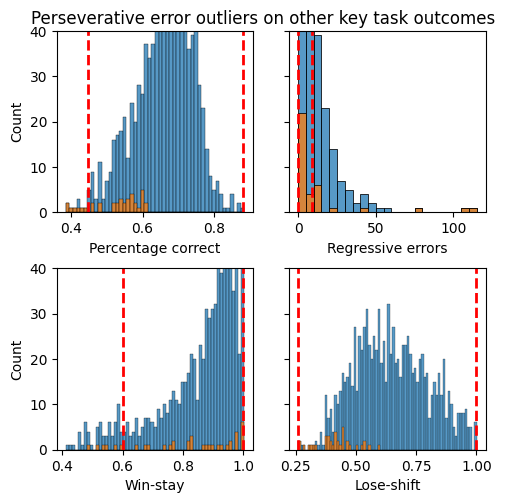

In [27]:
#plot where these outliers fall on other key task outcomes
fig, axes = plt.subplots(2,2, sharey=True)
fig.tight_layout(pad=1.75)
fig.set_size_inches(5, 5)
title="Perseverative error outliers on other key task outcomes"
plt.suptitle(title, fontsize=12)
plt.ylim(0,40) 
## this is because there are 37 outliers 
# #and we want to be able to see clearly where they lie in the distribution

#percentage coorrect
Q1 = task_summary['percentage_correct'].quantile(0.25)
Q3 = task_summary['percentage_correct'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1- 1.5 *  IQR
upper_bound = Q3 + 1.5 *  IQR
bin_width=0.01
bins=np.arange(min(task_summary.percentage_correct), max(task_summary.percentage_correct) + bin_width, bin_width)
sns.histplot(data=task_summary, x="percentage_correct", bins=bins, ax=axes[0,0]) 
sns.histplot(data=outliers, x="percentage_correct", bins=bins, ax=axes[0,0]) 
axes[0,0].axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[0,0].axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[0,0].set_xlabel('Percentage correct')

#regressive error
Q1 = task_summary['mean_regressive_er'].quantile(0.25)
Q3 = task_summary['mean_regressive_er'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1- 1.5 *  IQR
upper_bound = Q3 + 1.5 *  IQR
if lower_bound < min(task_summary.mean_regressive_er):
    lower_bound = min(task_summary.mean_regressive_er)
bin_width=5
bins=np.arange(min(task_summary.mean_regressive_er), max(task_summary.mean_regressive_er) + bin_width, bin_width)
sns.histplot(data=task_summary, x="mean_regressive_er", bins=bins, ax=axes[0,1]) 
sns.histplot(data=outliers, x="mean_regressive_er", bins=bins, ax=axes[0,1]) 
axes[0,1].axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[0,1].axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[0,1].set_xlabel('Regressive errors')

#win-stay
Q1 = task_summary['win_stay'].quantile(0.25)
Q3 = task_summary['win_stay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1- 1.5 *  IQR
upper_bound = Q3 + 1.5 *  IQR
if upper_bound > max(task_summary.win_stay):
    upper_bound = max(task_summary.win_stay)
bin_width=0.01
bins=np.arange(min(task_summary.win_stay), max(task_summary.win_stay) + bin_width, bin_width)
sns.histplot(data=task_summary, x="win_stay", bins=bins, ax=axes[1,0]) 
sns.histplot(data=outliers, x="win_stay", bins=bins, ax=axes[1,0]) 
axes[1,0].axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[1,0].axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[1,0].set_xlabel('Win-stay')

#lose-shift
Q1 = task_summary['lose_shift'].quantile(0.25)
Q3 = task_summary['lose_shift'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1- 1.5 *  IQR
upper_bound = Q3 + 1.5 *  IQR
if upper_bound > max(task_summary.lose_shift):
    upper_bound = max(task_summary.lose_shift)
if lower_bound < min(task_summary.lose_shift):
    lower_bound = min(task_summary.lose_shift)
bin_width=0.01
bins=np.arange(min(task_summary.lose_shift), max(task_summary.lose_shift) + bin_width, bin_width)
sns.histplot(data=task_summary, x="lose_shift", bins=bins, ax=axes[1,1]) 
sns.histplot(data=outliers, x="lose_shift", bins=bins, ax=axes[1,1]) 
axes[1,1].axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[1,1].axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[1,1].set_xlabel('Lose-shift')

Text(0.5, 23.52222222222222, '')

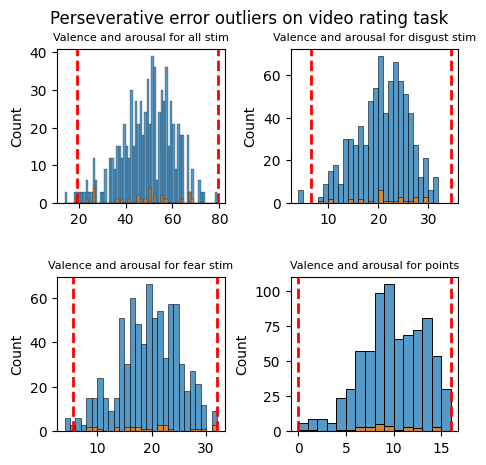

In [28]:
#plot how these outliers performed on the video rating task
fig, axes = plt.subplots(2,2, sharey=False)
fig.tight_layout(pad=3)
fig.set_size_inches(5, 5)
title="Perseverative error outliers on video rating task"
plt.suptitle(title, fontsize=12)
#plt.ylim(0,40) 
## this is because there are 37 outliers 
# #and we want to be able to see clearly where they lie in the distribution

#all emotions
Q1 = task_summary['all_emotion_score'].quantile(0.25)
Q3 = task_summary['all_emotion_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1- 1.5 *  IQR
upper_bound = Q3 + 1.5 *  IQR
bin_width=1
bins=np.arange(min(task_summary.all_emotion_score), max(task_summary.all_emotion_score) + bin_width, bin_width)
sns.histplot(data=task_summary, x="all_emotion_score", bins=bins, ax=axes[0,0]) 
sns.histplot(data=outliers, x="all_emotion_score", bins=bins, ax=axes[0,0]) 
axes[0,0].axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[0,0].axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[0,0].set_title('Valence and arousal for all stim', fontsize=8)
axes[0,0].set_xlabel('')
#disgust
Q1 = task_summary['disgust_score'].quantile(0.25)
Q3 = task_summary['disgust_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1- 1.5 *  IQR
upper_bound = Q3 + 1.5 *  IQR
if lower_bound < min(task_summary.disgust_score):
    lower_bound = min(task_summary.disgust_score)
bin_width=1
bins=np.arange(min(task_summary.disgust_score), max(task_summary.disgust_score) + bin_width, bin_width)
sns.histplot(data=task_summary, x="disgust_score", bins=bins, ax=axes[0,1]) 
sns.histplot(data=outliers, x="disgust_score", bins=bins, ax=axes[0,1]) 
axes[0,1].axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[0,1].axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[0,1].set_title('Valence and arousal for disgust stim', fontsize=8)
axes[0,1].set_xlabel('')

#fear
Q1 = task_summary['fear_score'].quantile(0.25)
Q3 = task_summary['fear_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1- 1.5 *  IQR
upper_bound = Q3 + 1.5 *  IQR
if upper_bound > max(task_summary.fear_score):
    upper_bound = max(task_summary.fear_score)
bin_width=1
bins=np.arange(min(task_summary.fear_score), max(task_summary.fear_score) + bin_width, bin_width)
sns.histplot(data=task_summary, x="fear_score", bins=bins, ax=axes[1,0]) 
sns.histplot(data=outliers, x="fear_score", bins=bins, ax=axes[1,0]) 
axes[1,0].axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[1,0].axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[1,0].set_title('Valence and arousal for fear stim', fontsize=8)
axes[1,0].set_xlabel('')
#points
Q1 = task_summary['points_score'].quantile(0.25)
Q3 = task_summary['points_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1- 1.5 *  IQR
upper_bound = Q3 + 1.5 *  IQR
if upper_bound > max(task_summary.points_score):
    upper_bound = max(task_summary.points_score)
if lower_bound < min(task_summary.points_score):
    lower_bound = min(task_summary.points_score)
bin_width=1
bins=np.arange(min(task_summary.points_score), max(task_summary.points_score) + bin_width, bin_width)
sns.histplot(data=task_summary, x="points_score", bins=bins, ax=axes[1,1]) 
sns.histplot(data=outliers, x="points_score", bins=bins, ax=axes[1,1]) 
axes[1,1].axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[1,1].axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[1,1].set_title('Valence and arousal for points', fontsize=8)
axes[1,1].set_xlabel('')

Is there a different proportion of people with mental health diagnoses in these outliers (relative to the rest of the sample)?

In [317]:
outliers_dem=outliers[['participant_no', 'cleaned_diagnosis', 'prolific_age', 'prolific_sex']].drop_duplicates()
outliers_dem['cleaned_diagnosis'].value_counts(normalize=True)

cleaned_diagnosis
No     0.677419
Yes    0.322581
Name: proportion, dtype: float64

In [318]:
no_outliers_dem=task_summary[~task_summary['participant_no'].isin(list(outliers_dem.participant_no))][['participant_no', 'cleaned_diagnosis', 'prolific_age', 'prolific_sex']].drop_duplicates()
no_outliers_dem['cleaned_diagnosis'].value_counts(normalize=True)

cleaned_diagnosis
No     0.702265
Yes    0.297735
Name: proportion, dtype: float64

In [319]:
outliers_MH=outliers_dem['cleaned_diagnosis'].value_counts()['Yes']
outliers_noMH=outliers_dem['cleaned_diagnosis'].value_counts()['No']
no_outliers_MH=no_outliers_dem['cleaned_diagnosis'].value_counts()['Yes']
no_outliers_noMH=no_outliers_dem['cleaned_diagnosis'].value_counts()['No']

observed=np.array([[outliers_MH, outliers_noMH], 
                [no_outliers_MH, no_outliers_noMH]])
chi2, p, dof, expected = stats.chi2_contingency(observed)
print(chi2), print(p)

0.006760821042061202
0.9344684202258998


(None, None)

In [320]:
observed

array([[ 10,  21],
       [ 92, 217]])

In [323]:
expected

array([[  9.3,  21.7],
       [ 92.7, 216.3]])

<h3>Assessing whether results are better explained by a emotion-or-not or a disgust-or-not distinction</h3>
<p>The main hypothesis testing analyses found a difference in learning (indexed by perseverative errors and lose-shift probability) between the points/loss-based feedback and disgust feedback.</p>
<p>However, no difference was found between <b>either</b> fear and points OR fear and disgust. This makes interpretation difficult as we cannot determine whether the result is better explained by a difference in learning between the two emotional conditions and points-based learning OR a distinct feature of disgust learning</p>
<p>To assess this, we run two competing models for both hypothesis tests:
<p>
<li>One assessing the presence of a difference between emotional learning (combining the fear and disgust block) and non-emotional learning (the points block)
<li>Another assessing the presence of a difference between disgust-based learning and learning which is not about digsust (combining the fear and points blocks)
<br>
<p>We will use a) the presence/absence of significant results and b) the model fit (as indexed by BIC - as before) to guide interpretation of these competing models</p>

In [324]:
##create extra columns splitting conditions into disgust or not vs emotion or not
task_summary.loc[task_summary['block_type']=='Disgust', 'disgustOrNot']='Disgust'
task_summary.loc[task_summary['block_type']!='Disgust', 'disgustOrNot']='Not'
task_summary.loc[task_summary['block_type']=='Points', 'emotionOrNot']='Not'
task_summary.loc[task_summary['block_type']!='Points', 'emotionOrNot']='Emotion'

In [325]:
###we start with perseverative errors
##because this hypothesised was tested in a generalized mixed effects model using R
##this can be found in the exploratory_generalized_mixed_effects_models folder
##filename: digustOrNot_emotionOrNot.ipynb

##overall these models show that the difference in perseverative errors found in hypothesis testing is better explained by:
##a difference between disgust learning and other types of learning
#only the disgustOrNot model has a significant effect of feedback type
#and BIC shows that this model produces a better fit

Next move to lose-shift analysis

In [326]:
#disgust vs not disgust
data=task_summary
formula = 'lose_shift ~ disgustOrNot + prolific_age'
disgustOrNot=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)
print(disgustOrNot.summary())

            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  lose_shift
No. Observations:    1020     Method:              ML        
No. Groups:          340      Scale:               0.0089    
Min. group size:     3        Log-Likelihood:      662.4706  
Max. group size:     3        Converged:           Yes       
Mean group size:     3.0                                     
-------------------------------------------------------------
                    Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.578    0.023 25.519 0.000  0.533  0.622
disgustOrNot[T.Not] 0.019    0.006  2.996 0.003  0.007  0.031
prolific_age        0.001    0.000  2.736 0.006  0.000  0.002
Group Var           0.014    0.017                           



In [327]:
#emotional learning vs points-based learning
data=task_summary
formula = 'lose_shift ~ emotionOrNot + prolific_age'
emotionOrNot=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)
print(emotionOrNot.summary())

            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  lose_shift
No. Observations:    1020     Method:              ML        
No. Groups:          340      Scale:               0.0089    
Min. group size:     3        Log-Likelihood:      663.9764  
Max. group size:     3        Converged:           Yes       
Mean group size:     3.0                                     
-------------------------------------------------------------
                    Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.583    0.022 26.090 0.000  0.539  0.627
emotionOrNot[T.Not] 0.022    0.006  3.469 0.001  0.009  0.034
prolific_age        0.001    0.000  2.736 0.006  0.000  0.002
Group Var           0.014    0.017                           



Both models produce a significant effect of feedback-type. But the emotion-or-not model produces a better fit

In [328]:
bic=pd.DataFrame({'disgustOrNot': [disgustOrNot.bic],
                    'emotionOrNot': [emotionOrNot.bic]})
print(bic.sort_values(by=0, axis=1))

   emotionOrNot  disgustOrNot
0   -1293.31501  -1290.303362


<h3>Running the video ratings analysis with <b>all</b> of the fear and disgust videos</h3>
<p>The planned video rating analysis involved just the stimuli selected to be used in the reversal learning task (to validate the stimulus selection process)</p>
<p>Here, we look at valence, arousal, fear and disgust ratings across <b>all 10 fear and disgust videos</b></p>

In [29]:
#create long form df which allows for this
long_vid_ratings=pd.DataFrame()
for i in vid_ratings_df.index:
    row=vid_ratings_df.loc[i]
    timepoint_1=pd.DataFrame({
    'participant_no': [row.participant_no],
    #'age': [row.prolific_age],
    #'sex': [row. prolific_sex],
    'Vid': [str(row['Vid'])],
    'trial_type': [row.trial_type],
    'Valence': [row.unpleasant_1],
    'Arousal': [row.arousing_1],
    'Fear': [row.frightening_1],
    'Disgust': [row.disgusting_1],
    'Timepoint': 1.0
    })
    timepoint_2=pd.DataFrame({
        'participant_no': [row.participant_no],
        #'age': [row.prolific_age],
        #'sex': [row. prolific_sex],
        'Vid': [str(row['Vid'])],
        'trial_type': [row.trial_type],
        'Valence': [row.unpleasant_2],
        'Arousal': [row.arousing_2],
        'Fear': [row.frightening_2],
        'Disgust': [row.disgusting_2],
        'Timepoint': 2.0
    })
    long_vid_ratings_row=pd.concat([timepoint_1, timepoint_2])
    long_vid_ratings=pd.concat([long_vid_ratings_row, long_vid_ratings])
    long_vid_ratings=long_vid_ratings[long_vid_ratings.trial_type!="points"]

In [30]:
long_vid_ratings=pd.merge(long_vid_ratings, task_summary[['participant_no', 'prolific_age', 'prolific_sex']].drop_duplicates(), on='participant_no', how='outer')

<p><b>MODEL A: VALENCE ~ TRIAL_TYPE*TIMEPOINT</b></p>

In [31]:
##Test the fit of different variations of model A
data=long_vid_ratings.reset_index()
data.replace(['disgust', 'fear'], [1.0,2.0], inplace=True)

formula = 'Valence ~ trial_type*Timepoint'

model=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
basic_model=model.fit(reml=False)

   vid_randint_randslope     randslope   basic_model   vid_randint
0           33478.119232  34393.964656  34851.437478  34899.932634


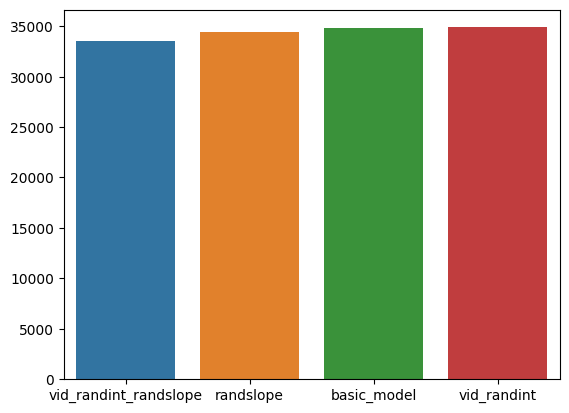

In [32]:
#test which random effects to include
vid_randint=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}).fit(reml=False)
randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', re_formula='~trial_type').fit(reml=False)
vid_randint_randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}, re_formula='~trial_type').fit(reml=False)

bic=pd.DataFrame({'basic_model': [basic_model.bic], 
                    'vid_randint': [vid_randint.bic], 
                    'randslope': [randslope.bic],
                    'vid_randint_randslope':[vid_randint_randslope.bic]})
sns.barplot(bic.sort_values(by=0, axis=1))
print(bic.sort_values(by=0, axis=1)) ##in this case, vid rantintrandslope is best

   age_covariate  sex_covariate  sex_age_covariate  no_covariate
0   27979.148687   27980.350942       27985.557513  33478.119232


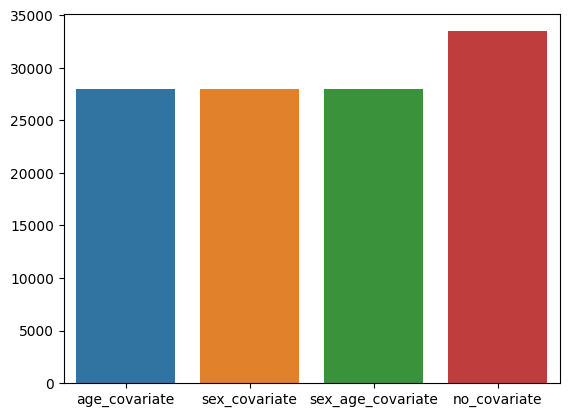

In [33]:
##test which covariates to add -- Using the random effects which were best above
no_covariate=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}, re_formula='~trial_type').fit(reml=False)
sex_covariate=smf.mixedlm(formula+str('+prolific_sex'), data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}, re_formula='~trial_type').fit(reml=False)
age_covariate=smf.mixedlm(formula+str('+prolific_age'), data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}, re_formula='~trial_type').fit(reml=False)
sex_age_covariate=smf.mixedlm(formula+str('+prolific_sex+prolific_age'), data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}, re_formula='~trial_type').fit(reml=False)

bic=pd.DataFrame({'no_covariate': [no_covariate.bic], 
                    'sex_covariate': [sex_covariate.bic], 
                    'age_covariate': [age_covariate.bic],
                    'sex_age_covariate': [sex_age_covariate.bic]})
sns.barplot(bic.sort_values(by=0, axis=1))
print(bic.sort_values(by=0, axis=1)) ##in this case, agecovariate is the best

In [34]:
age_covariate.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
==================================================================
Model:               MixedLM    Dependent Variable:    Valence    
No. Observations:    6800       Method:                ML         
No. Groups:          340        Scale:                 1.8274     
Min. group size:     20         Log-Likelihood:        -13945.4510
Max. group size:     20         Converged:             Yes        
Mean group size:     20.0                                         
------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept               5.968    0.323  18.493 0.000  5.335  6.600
trial_type             -1.300    0.129 -10.057 0.000 -1.553 -1.047
Timepoint               0.312    0.104   3.007 0.003  0.109  0.515
trial_type:Timepoint   -0.022    0.066  -0.341 0.733 -0.151  0.106
prolific_age           -0.010    0.005  -1.863 0.062 -0.020  0.001
Group Var               5.177    0.450                            
Group x trial_type Cov -2.116    0.231                            
trial_type Var          1.378    0.139                            
Vid Var                 1.622    0.068                            
==================================================================

"""

<p><b>MODEL B: AROUSAL ~ TRIAL_TYPE*TIMEPOINT</b></p>

In [35]:
##mixed effects model Arousal (model B)
formula = 'Arousal ~ trial_type*Timepoint'

model=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
basic_model=model.fit(reml=False)

   vid_randint_randslope     randslope   basic_model   vid_randint
0           30501.210664  30770.828055  30967.401758  32394.122564


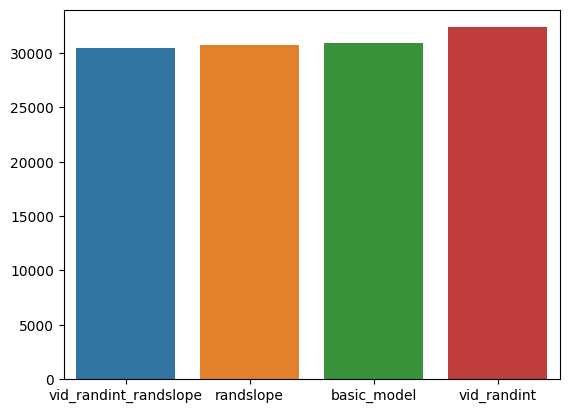

In [36]:
#select best random effects structure
vid_randint=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}).fit(reml=False)
randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', re_formula='~trial_type').fit(reml=False) 
vid_randint_randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}, re_formula='~trial_type').fit(reml=False) 

bic=pd.DataFrame({'basic_model': [basic_model.bic], 
                    'vid_randint': [vid_randint.bic], 
                    'randslope': [randslope.bic],
                    'vid_randint_randslope':[vid_randint_randslope.bic]})
sns.barplot(bic.sort_values(by=0, axis=1))
print(bic.sort_values(by=0, axis=1)) ##in this case, basic model is best

   age_covariate  sex_covariate  sex_age_covariate  no_covariate
0   25514.187657   25516.640372       25518.750615  30501.210664


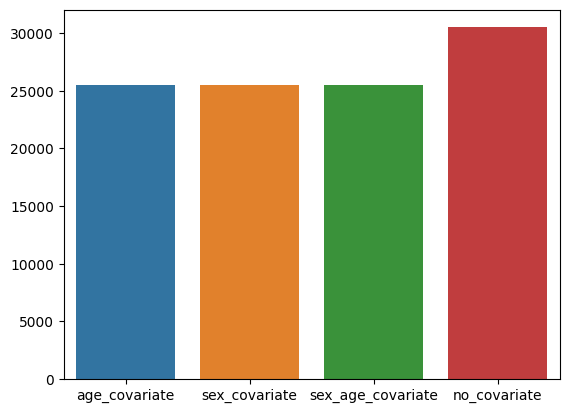

In [37]:
##test which covariates to add -- Using the random effects which were best above
no_covariate=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}, re_formula='~trial_type').fit(reml=False)
sex_covariate=smf.mixedlm(formula+str('+prolific_sex'), data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}, re_formula='~trial_type').fit(reml=False)
age_covariate=smf.mixedlm(formula+str('+prolific_age'), data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}, re_formula='~trial_type').fit(reml=False)
sex_age_covariate=smf.mixedlm(formula+str('+prolific_sex+prolific_age'), data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}, re_formula='~trial_type').fit(reml=False)

bic=pd.DataFrame({'no_covariate': [no_covariate.bic], 
                    'sex_covariate': [sex_covariate.bic], 
                    'age_covariate': [age_covariate.bic],
                    'sex_age_covariate': [sex_age_covariate.bic]})
sns.barplot(bic.sort_values(by=0, axis=1))
print(bic.sort_values(by=0, axis=1)) # again, age covariate wins

In [38]:
age_covariate.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:                MixedLM   Dependent Variable:   Arousal    
No. Observations:     6800      Method:               ML         
No. Groups:           340       Scale:                1.6158     
Min. group size:      20        Log-Likelihood:       -12712.9704
Max. group size:      20        Converged:            Yes        
Mean group size:      20.0                                       
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               2.579    0.273  9.457 0.000  2.044  3.113
trial_type              0.736    0.107  6.858 0.000  0.526  0.946
Timepoint               0.262    0.097  2.691 0.007  0.071  0.453
trial_type:Timepoint   -0.212    0.062 -3.434 0.001 -0.333 -0.091
prolific_age            0.012    0.005  2.651 0.008  0.003  0.021
Group Var               2.490    0.242                           
Group x trial_type Cov -0.700    0.109                           
trial_type Var          0.451    0.062                           
Vid Var                 0.582    0.040                           
=================================================================

"""

In [39]:
no_covariate.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:                MixedLM   Dependent Variable:   Arousal    
No. Observations:     8100      Method:               ML         
No. Groups:           405       Scale:                1.6225     
Min. group size:      20        Log-Likelihood:       -15210.1070
Max. group size:      20        Converged:            Yes        
Mean group size:      20.0                                       
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               3.234    0.166 19.454 0.000  2.908  3.559
trial_type              0.674    0.099  6.780 0.000  0.479  0.868
Timepoint               0.227    0.090  2.538 0.011  0.052  0.403
trial_type:Timepoint   -0.211    0.057 -3.733 0.000 -0.322 -0.100
Group Var               2.476    0.221                           
Group x trial_type Cov -0.689    0.102                           
trial_type Var          0.513    0.061                           
Vid Var                 0.601    0.037                           
=================================================================

"""

<h3>Now look at fear and disgust T1 in comparison to points (models E-H)</h3>

In [40]:
T1_and_points_data=pd.concat([vid_ratings_df,chosen_stim_df[chosen_stim_df.trial_type=='points']]).reset_index()
T1_and_points_data=T1_and_points_data[['participant_no', 'trial_type', 'unpleasant_1', 'arousing_1', 'disgusting_1', 'frightening_1', 'Vid']].sort_values('trial_type')
T1_and_points_data=pd.merge(T1_and_points_data, task_summary[['participant_no', 'prolific_age', 'prolific_sex']].drop_duplicates(), on='participant_no', how='outer')

<p><b>MODEL E: VALENCE ~ TRIAL_TYPE</b></p>

In [41]:
#Model E
data=T1_and_points_data
data.replace(['points'],['apoints'], inplace=True) ##makes comparison condition points
formula = 'unpleasant_1 ~ trial_type'

model=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
basic_model=model.fit(reml=False)

    basic_model          vid_randint     randslope  vid_randint_randslope
0  18922.499899  CONVERGENCE WARNING  18865.738113            18874.10686


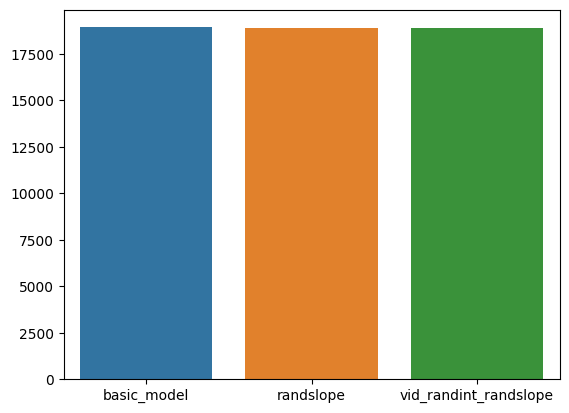

In [42]:
#test random effects
#commented out models did not converge 

#vid_randint=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}).fit(reml=False) 
randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', re_formula='~trial_type').fit(reml=False) 
vid_randint_randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}, re_formula='~trial_type').fit(reml=False)

bic=pd.DataFrame({'basic_model': [basic_model.bic], 
                    'vid_randint': ['CONVERGENCE WARNING'], 
                    'randslope': [randslope.bic],
                    'vid_randint_randslope':[vid_randint_randslope.bic]})
sns.barplot(bic)
print(bic) ##in this case, basic model is best

   age_covariate  sex_covariate  sex_age_covariate  no_covariate
0   15982.137186   15984.588267       15987.765326  18922.499899


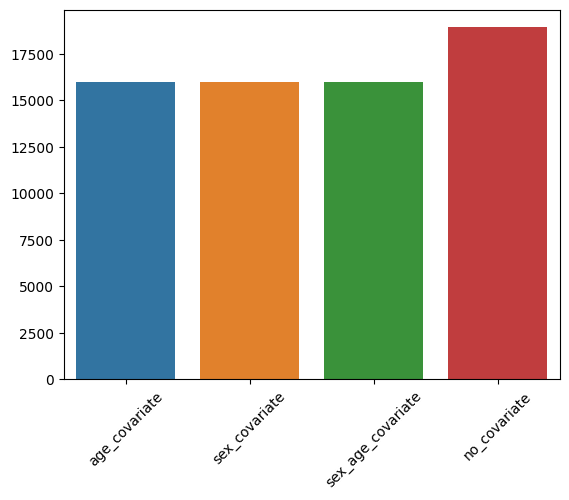

In [43]:
#test covariates
no_covariate=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)
sex_covariate=smf.mixedlm(formula+str('+prolific_sex'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
age_covariate=smf.mixedlm(formula+str('+prolific_age'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
sex_age_covariate=smf.mixedlm(formula+str('+prolific_sex+prolific_age'), data, groups=data['participant_no'], missing='drop').fit(reml=False)

bic=pd.DataFrame({'no_covariate': [no_covariate.bic], 
                    'sex_covariate': [sex_covariate.bic], 
                    'age_covariate': [age_covariate.bic],
                    'sex_age_covariate': [sex_age_covariate.bic]})
plt.xticks(rotation=45) 
sns.barplot(bic.sort_values(by=0, axis=1))
print(bic.sort_values(by=0, axis=1)) ##in this case, the age covariate is best

In [44]:
#Hypothesis test using this model
age_covariate.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:               MixedLM   Dependent Variable:   unpleasant_1
No. Observations:    3658      Method:               ML          
No. Groups:          340       Scale:                3.9104      
Min. group size:     10        Log-Likelihood:       -7966.4546  
Max. group size:     11        Converged:            Yes         
Mean group size:     10.8                                        
-----------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              5.210    0.266  19.590 0.000  4.689  5.731
trial_type[T.disgust] -0.204    0.133  -1.533 0.125 -0.465  0.057
trial_type[T.fear]    -1.527    0.133 -11.458 0.000 -1.788 -1.265
prolific_age          -0.011    0.005  -2.209 0.027 -0.021 -0.001
Group Var              1.546    0.078                            
=================================================================

"""

<p><b>MODEL F: AROUSAL ~ TRIAL_TYPE</b></p>

In [45]:
#Model F
formula = 'arousing_1 ~ trial_type'
model=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop')
basic_model=model.fit(reml=False)

    basic_model          vid_randint     randslope  vid_randint_randslope
0  16936.590101  CONVERGENCE WARNING  16883.492013           16891.860249


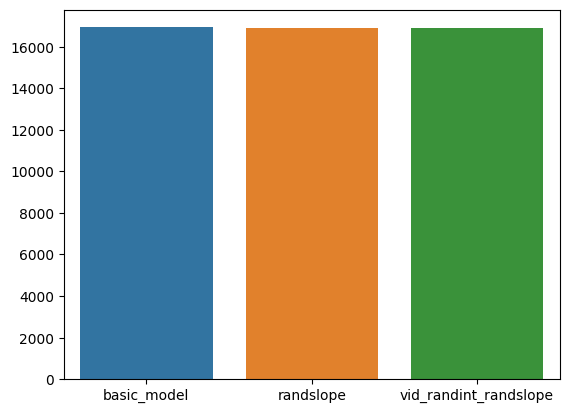

In [46]:
#test random effects
#commented out models did not converge

#vid_randint=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}).fit(reml=False)
randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', re_formula='~trial_type').fit(reml=False) 
vid_randint_randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'Vid': '0+Vid'}, re_formula='~trial_type').fit(reml=False) 

bic=pd.DataFrame({'basic_model': [basic_model.bic], 
                    'vid_randint': ['CONVERGENCE WARNING'], 
                    'randslope': [randslope.bic],
                    'vid_randint_randslope':[vid_randint_randslope.bic]})
sns.barplot(bic)
print(bic) ##in this case, randslope model

   age_covariate  sex_covariate  sex_age_covariate  no_covariate
0   14291.837239   14294.695451       14296.932854  16883.492013


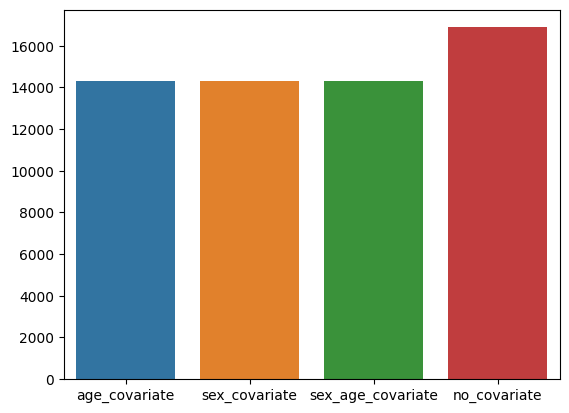

In [47]:
#test covariates
no_covariate=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', re_formula='~trial_type').fit(reml=False)
sex_covariate=smf.mixedlm(formula+str('+prolific_sex'), data, groups=data['participant_no'], missing='drop' , re_formula='~trial_type').fit(reml=False)
age_covariate=smf.mixedlm(formula+str('+prolific_age'), data, groups=data['participant_no'], missing='drop', re_formula='~trial_type').fit(reml=False)
sex_age_covariate=smf.mixedlm(formula+str('+prolific_sex+prolific_age'), data, groups=data['participant_no'], missing='drop', re_formula='~trial_type').fit(reml=False)

bic=pd.DataFrame({'no_covariate': [no_covariate.bic], 
                    'sex_covariate': [sex_covariate.bic], 
                    'age_covariate': [age_covariate.bic],
                    'sex_age_covariate': [sex_age_covariate.bic]})
sns.barplot(bic.sort_values(by=0, axis=1))
print(bic.sort_values(by=0, axis=1)) ##in this case, age covariate

In [48]:
age_covariate.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Mixed Linear Model Regression Results
=========================================================================================
Model:                       MixedLM            Dependent Variable:            arousing_1
No. Observations:            3658               Method:                        ML        
No. Groups:                  340                Scale:                         2.2275    
Min. group size:             10                 Log-Likelihood:                -7100.7929
Max. group size:             11                 Converged:                     Yes       
Mean group size:             10.8                                                        
-----------------------------------------------------------------------------------------
                                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                       4.333    0.226 19.136 0.000  3.889  4.777
trial_type[T.disgust]                          -0.887    0.131 -6.771 0.000 -1.144 -0.630
trial_type[T.fear]                             -0.363    0.134 -2.715 0.007 -0.625 -0.101
prolific_age                                    0.010    0.004  2.473 0.013  0.002  0.018
Group Var                                       1.769    0.248                           
Group x trial_type[T.disgust] Cov              -1.150    0.236                           
trial_type[T.disgust] Var                       1.931    0.285                           
Group x trial_type[T.fear] Cov                 -1.359    0.246                           
trial_type[T.disgust] x trial_type[T.fear] Cov  1.860    0.270                           
trial_type[T.fear] Var                          2.170    0.298                           
=========================================================================================

"""